In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

In [3]:
X # tương ứng nhãn (1) , x1 mảng chứa (2.36922357, ...), x2 mảng chứa (2.80814383, ...)

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [2.36922357, 1.79685366, 2.62403321, 1.47419195, 0.88426604,
        2.12113926, 2.2476692 , 1.96854695, 1.63084652, 1.48326168,
        4.19938548, 4.28944654, 4.23823874, 3.6308137 , 3.68479018,
        3.29136345, 3.92001433, 2.81567931, 4.35329667, 4.49703316],
       [2.80814383, 1.847992  , 2.37448731, 1.4864744 , 1.22959089,
        1.71466867, 2.02516349, 2.39191963, 1.93229867, 2.37675646,
        2.48837091, 2.13984637, 2.84179517, 2.60155427, 2.62000988,
        1.66159132, 2.50236342, 1.37266552, 2.62408608, 2.5540556 ]])

In [4]:
# hàm dấu
def h(w, x):    
    return np.sign(np.dot(w.T, x))

# phát điểm bị lỗi lấy giá trị hàm sign h(w, X) so với nhãn y
def has_converged(X, y, w):
    
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

# tìm ra điểm w sao; tham số w.. X y là tập dữ liệu mẫu 
def perceptron(X, y, w_init):
    # w random ngẫu nhiên
    w = [w_init]
    # N cho bằng 20; cột 
    N = X.shape[1]
    # danh sách các điểm bị sai
    mis_points = []
    # khi nào sai thì out
    while True:
        # mix data ; lấy ngẫy nhiên trong số các điểm.
        mix_id = np.random.permutation(N)
        for i in range(N):
            # (xi yi) tọa độ của điểm với thộc tính x1, x2 
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            # hàm dấu h mà khác với nhãn -> điểm lỗi 
            if h(w[-1], xi)[0] != yi:
                # lỗi thì thêm vào miss_point
                mis_points.append(mix_id[i])
                # câu lệnh cập nhật w (w[-1] phần tử cuối cùng trong ds)
                w_new = w[-1] + yi*xi 
                w.append(w_new)
        # nếu đúng thì thoát
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points) 

In [5]:
d = X.shape[0]
# khởi tạo w ban đầu
w_init = np.random.randn(d, 1)
# gọi hàm dữ liệu mẫu và danh sách w khởi tạo. Trả về w và m số điểm bị lỗi 
(w, m) = perceptron(X, y, w_init)
print(m)
print(w)
print(len(w))

[19, 3, 1]
[array([[ 1.23540627],
       [-0.91466312],
       [ 1.24501565]]), array([[ 0.23540627],
       [-5.41169628],
       [-1.30903995]]), array([[ 1.23540627],
       [-3.93750433],
       [ 0.17743444]]), array([[ 2.23540627],
       [-2.14065066],
       [ 2.02542644]])]
4


In [6]:
def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

MovieWriter imagemagick unavailable; using Pillow instead.


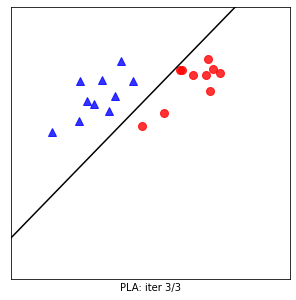

In [7]:
## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
def viz_alg_1d_2(w):
    it = len(w)    
    fig, ax = plt.subplots(figsize=(5, 5))  
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hide axis 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save 
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()
    
viz_alg_1d_2(w)

MovieWriter imagemagick unavailable; using Pillow instead.


[7, 10, 0, 18, 3, 6, 14, 9, 7, 17, 0, 19, 3, 2, 12, 6, 11, 7]
[array([[-0.3135082 ],
       [ 0.77101174],
       [-1.86809065]]), array([[ 0.6864918 ],
       [ 2.63478794],
       [-0.27092518]]), array([[-0.3135082 ],
       [-1.83924575],
       [-2.67499938]]), array([[ 0.6864918 ],
       [ 0.38171482],
       [-0.4792021 ]]), array([[-0.3135082 ],
       [-3.5561285 ],
       [-2.03950157]]), array([[ 0.6864918 ],
       [-1.52911433],
       [-0.56939716]]), array([[1.6864918 ],
       [0.7000917 ],
       [1.15985741]]), array([[ 0.6864918 ],
       [-4.04483948],
       [-1.51642863]]), array([[ 1.6864918 ],
       [-1.67292211],
       [ 0.85952495]]), array([[2.6864918 ],
       [0.19085409],
       [2.45669043]]), array([[ 1.6864918 ],
       [-3.31990027],
       [ 0.33788932]]), array([[ 2.6864918],
       [-1.0989397],
       [ 2.5336866]]), array([[ 1.6864918 ],
       [-4.9776611 ],
       [ 0.41241776]]), array([[ 2.6864918 ],
       [-2.95064692],
       [ 1.8825221

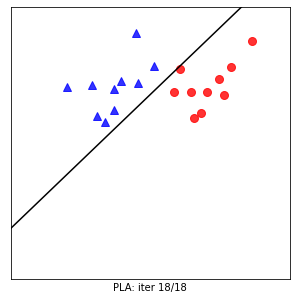

In [8]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov  9 14:33:36 2018

@author: DELL
"""


# generate data
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(2)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T

X = np.concatenate((X0, X1), axis = 1)
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1)
# Xbar 
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)


def h(w, x):    
    return np.sign(np.dot(w.T, x))

def has_converged(X, y, w):
    
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = []
    while True:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(3, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi 

                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

d = X.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X, y, w_init)
print(m)
print(w)
print(len(w))

def draw_line(w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')


## Visualization
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation 
def viz_alg_1d_2(w):
    it = len(w)    
    fig, ax = plt.subplots(figsize=(5, 5))  
    
    def update(i):
        ani = plt.cla()
        #points
        ani = plt.plot(X0[0, :], X0[1, :], 'b^', markersize = 8, alpha = .8)
        ani = plt.plot(X1[0, :], X1[1, :], 'ro', markersize = 8, alpha = .8)
        ani = plt.axis([0 , 6, -2, 4])
        i2 =  i if i < it else it-1
        ani = draw_line(w[i2])
        if i < it-1:
            # draw one  misclassified point
            circle = plt.Circle((X[1, m[i]], X[2, m[i]]), 0.15, color='k', fill = False)
            ax.add_artist(circle)
        # hide axis 
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])

        label = 'PLA: iter %d/%d' %(i2, it-1)
        ax.set_xlabel(label)
        return ani, ax 
        
    anim = FuncAnimation(fig, update, frames=np.arange(0, it + 2), interval=1000)
    # save 
    anim.save('pla_vis.gif', dpi = 100, writer = 'imagemagick')
    plt.show()
    
viz_alg_1d_2(w)